### Import libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
matches = pd.read_csv(r"C:\Users\master\Downloads\FIFA WC data\WorldCupMatches.csv")
players = pd.read_csv(r"C:\Users\master\Downloads\FIFA WC data\WorldCupPlayers.csv")
world_cups = pd.read_csv(r"C:\Users\master\Downloads\FIFA WC data\WorldCups.csv")

In [3]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
x = matches.isna().sum(axis=1)
x[x==20].index

Index([ 852,  853,  854,  855,  856,  857,  858,  859,  860,  861,
       ...
       4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571],
      dtype='int64', length=3720)

In [5]:
matches.dropna(how='all')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [7]:
matches.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,852.0,NaN,NaN,NaN,1985.089202,22.448825,1930.0,1970.0,1990.0,2002.0,2014.0
Datetime,852,602,27 May 1934 - 16:30,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,852,23,Round of 16,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadium,852,181,Estadio Azteca,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,852,151,Mexico City,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Team Name,852,78,Brazil,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Team Goals,852.0,NaN,NaN,NaN,1.811033,1.610255,0.0,1.0,2.0,3.0,10.0
Away Team Goals,852.0,NaN,NaN,NaN,1.0223,1.087573,0.0,0.0,1.0,2.0,7.0
Away Team Name,852,83,Mexico,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Win conditions,852,43,,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [9]:
players["Position"].unique()

array(['GK', nan, 'C', 'GKC'], dtype=object)

In [10]:
players.describe(include="all")

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
count,3.778400e+04,3.778400e+04,37784,37784,37784,37784.000000,37784,4143,9069
unique,NaN,NaN,82,335,2,NaN,7663,3,1893
top,NaN,NaN,BRA,SCOLARI Luiz Felipe (BRA),N,NaN,RONALDO,GK,OH46'
freq,NaN,NaN,2403,575,19040,NaN,33,2441,247
mean,1.105647e+07,6.362233e+07,NaN,NaN,NaN,10.726022,NaN,NaN,NaN
std,2.770144e+07,1.123916e+08,NaN,NaN,NaN,6.960138,NaN,NaN,NaN
min,2.010000e+02,2.500000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,2.630000e+02,1.199000e+03,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
50%,3.370000e+02,2.216000e+03,NaN,NaN,NaN,11.000000,NaN,NaN,NaN
75%,2.559310e+05,9.741000e+07,NaN,NaN,NaN,17.000000,NaN,NaN,NaN


In [11]:
players["Line-up"].value_counts()

Line-up
N    19040
S    18744
Name: count, dtype: int64

In [12]:
players["Position"].value_counts()

Position
GK     2441
C      1510
GKC     192
Name: count, dtype: int64

In [13]:
players[players["Coach Name"] == "CAUDRON Raoul (FRA)"]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
10,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel PINEL,NaN,NaN
12,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex VILLAPLANE,C,NaN
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
16,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel CAPELLE,NaN,NaN
18,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Augustin CHANTREL,NaN,NaN


S indicates the player in starting line up
N indicates the players how join in later or simply we can say substitute player.


In [14]:
world_cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [15]:
world_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [16]:
world_cups.describe(include="all")

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20,20,20,20,20,20.000000,20.000000,20.000000,20
unique,NaN,15,9,10,14,16,NaN,NaN,NaN,20
top,NaN,Italy,Brazil,Argentina,Germany,Uruguay,NaN,NaN,NaN,590.549
freq,NaN,2,5,3,3,3,NaN,NaN,NaN,1
mean,1974.800000,NaN,NaN,NaN,NaN,NaN,118.950000,21.250000,41.800000,NaN
std,25.582889,NaN,NaN,NaN,NaN,NaN,32.972836,7.268352,17.218717,NaN
min,1930.000000,NaN,NaN,NaN,NaN,NaN,70.000000,13.000000,17.000000,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,89.000000,16.000000,30.500000,NaN
50%,1976.000000,NaN,NaN,NaN,NaN,NaN,120.500000,16.000000,38.000000,NaN
75%,1995.000000,NaN,NaN,NaN,NaN,NaN,145.250000,26.000000,55.000000,NaN


In [17]:
merge1 = pd.merge(matches, players, on="MatchID")
merge1

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Home Team Initials,Away Team Initials,RoundID_y,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,FRA,MEX,201,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,FRA,MEX,201,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,FRA,MEX,201,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,FRA,MEX,201,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,FRA,MEX,201,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,GER,ARG,255959,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
39252,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,GER,ARG,255959,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
39253,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,GER,ARG,255959,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
39254,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,GER,ARG,255959,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [18]:
merged_data = pd.merge(merge1, world_cups, on = "Year")
merged_data

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Event,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,NaN,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,NaN,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
2,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,G40',Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
3,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,G70',Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
4,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,NaN,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,NaN,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
39252,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,NaN,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
39253,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,IH46' Y65',Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
39254,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,NaN,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [19]:
merged_data["Year"] = merged_data["Year"].astype(int)
merged_data["Attendance_y"] = pd.to_numeric(merged_data["Attendance_y"], errors='coerce')

In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39256 entries, 0 to 39255
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  39256 non-null  int32  
 1   Datetime              39256 non-null  object 
 2   Stage                 39256 non-null  object 
 3   Stadium               39256 non-null  object 
 4   City                  39256 non-null  object 
 5   Home Team Name        39256 non-null  object 
 6   Home Team Goals       39256 non-null  float64
 7   Away Team Goals       39256 non-null  float64
 8   Away Team Name        39256 non-null  object 
 9   Win conditions        39256 non-null  object 
 10  Attendance_x          39072 non-null  float64
 11  Half-time Home Goals  39256 non-null  float64
 12  Half-time Away Goals  39256 non-null  float64
 13  Referee               39256 non-null  object 
 14  Assistant 1           39256 non-null  object 
 15  Assistant 2        

In [21]:
merged_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,39256.0,NaN,NaN,NaN,1986.790198,22.412554,1930.0,1970.0,1990.0,2006.0,2014.0
Datetime,39256,602,27 May 1934 - 16:30,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,39256,23,Round of 16,3985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadium,39256,181,Estadio Azteca,836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,39256,151,Rio De Janeiro,1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Team Name,39256,78,Brazil,4009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Team Goals,39256.0,NaN,NaN,NaN,1.767653,1.579981,0.0,1.0,1.0,2.0,10.0
Away Team Goals,39256.0,NaN,NaN,NaN,1.026467,1.119818,0.0,0.0,1.0,1.0,7.0
Away Team Name,39256,83,Mexico,1757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Win conditions,39256,43,,35601,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
median_1 = merged_data["Attendance_y"].median()
median_2 = merged_data["Attendance_y"].median()

In [23]:
merged_data["Attendance_x"].fillna(median_1, inplace=True)
merged_data["Attendance_y"].fillna(median_2, inplace=True)

In [24]:
merged_data.isna().sum()

Year                        0
Datetime                    0
Stage                       0
Stadium                     0
City                        0
Home Team Name              0
Home Team Goals             0
Away Team Goals             0
Away Team Name              0
Win conditions              0
Attendance_x                0
Half-time Home Goals        0
Half-time Away Goals        0
Referee                     0
Assistant 1                 0
Assistant 2                 0
RoundID_x                   0
MatchID                     0
Home Team Initials          0
Away Team Initials          0
RoundID_y                   0
Team Initials               0
Coach Name                  0
Line-up                     0
Shirt Number                0
Player Name                 0
Position                34863
Event                   29695
Country                     0
Winner                      0
Runners-Up                  0
Third                       0
Fourth                      0
GoalsScore

In [25]:
merged_data

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Event,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,NaN,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,NaN,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
2,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,G40',Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
3,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,G70',Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
4,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,NaN,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,NaN,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,768.607
39252,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,NaN,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,768.607
39253,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,IH46' Y65',Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,768.607
39254,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,NaN,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,768.607


In [26]:
numeric_columns = merged_data.select_dtypes(include=["float64", "int64"])
numeric_columns

,Home Team Goals,Away Team Goals,Attendance_x,Half-time Home Goals,Half-time Away Goals,RoundID_x,MatchID,RoundID_y,Shirt Number,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,4.0,1.0,4444.0,3.0,0.0,201.0,1096.0,201,0,70,13,18,590.549
1,4.0,1.0,4444.0,3.0,0.0,201.0,1096.0,201,0,70,13,18,590.549
2,4.0,1.0,4444.0,3.0,0.0,201.0,1096.0,201,0,70,13,18,590.549
3,4.0,1.0,4444.0,3.0,0.0,201.0,1096.0,201,0,70,13,18,590.549
4,4.0,1.0,4444.0,3.0,0.0,201.0,1096.0,201,0,70,13,18,590.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,1.0,0.0,74738.0,0.0,0.0,255959.0,300186501.0,255959,19,171,32,64,768.607
39252,1.0,0.0,74738.0,0.0,0.0,255959.0,300186501.0,255959,6,171,32,64,768.607
39253,1.0,0.0,74738.0,0.0,0.0,255959.0,300186501.0,255959,20,171,32,64,768.607
39254,1.0,0.0,74738.0,0.0,0.0,255959.0,300186501.0,255959,21,171,32,64,768.607


In [27]:
#merged_data[merged_data["Stadium"]=="Pocitos"][["MatchesPlayed", "QualifiedTeams", "GoalsScored"]]

groupby_data = merged_data.groupby(merged_data["Stage"]=="Final")[["MatchesPlayed", "QualifiedTeams", "GoalsScored"]].value_counts().reset_index()
groupby_data

,Stage,MatchesPlayed,QualifiedTeams,GoalsScored,count
0,False,64,32,171,7740
1,False,64,32,161,2898
2,False,64,32,145,2897
3,False,64,32,147,2897
4,False,32,16,89,2728
5,False,52,24,115,2248
6,False,52,24,132,2244
7,False,52,24,141,2244
8,False,52,24,146,2237
9,False,38,16,97,1628


<Axes: xlabel='MatchesPlayed', ylabel='GoalsScored'>

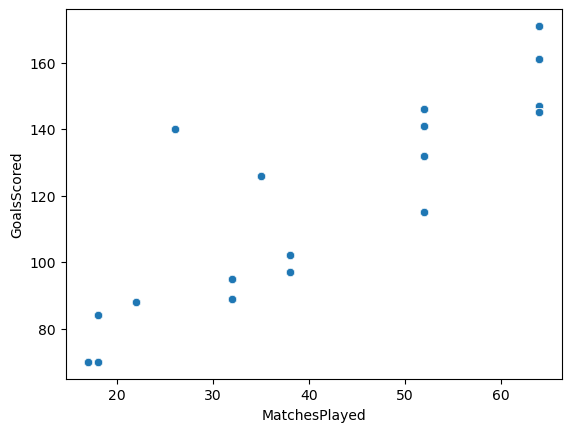

In [70]:
sns.scatterplot(x=merged_data["MatchesPlayed"], y=merged_data["GoalsScored"])

### Data visualizations 

<Axes: ylabel='Density'>

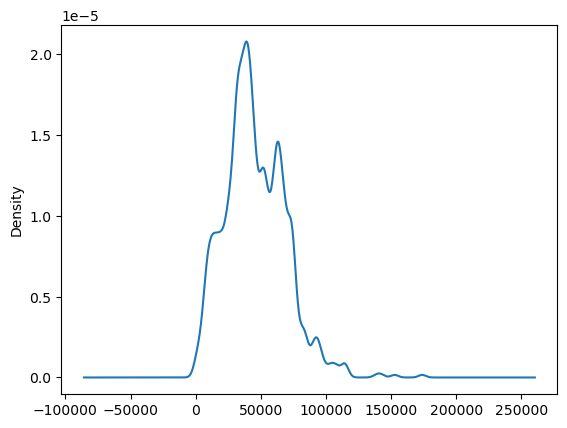

In [27]:
merged_data["Attendance_x"].plot(kind="kde")

<Axes: ylabel='Density'>

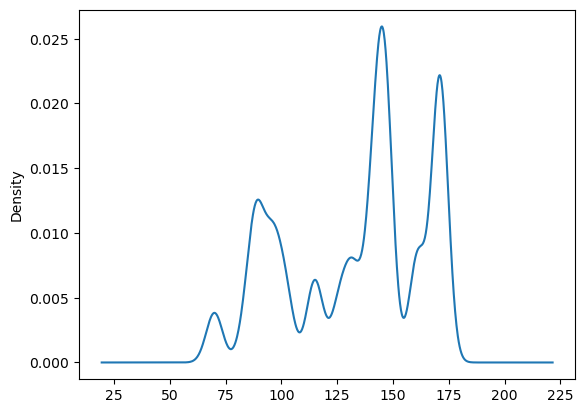

In [28]:
merged_data["GoalsScored"].plot(kind="kde")

In [29]:
num_data = merged_data.select_dtypes(include="int64")
num_data

,RoundID_y,Shirt Number,GoalsScored,QualifiedTeams,MatchesPlayed
0,201,0,70,13,18
1,201,0,70,13,18
2,201,0,70,13,18
3,201,0,70,13,18
4,201,0,70,13,18
...,...,...,...,...,...
39251,255959,19,171,32,64
39252,255959,6,171,32,64
39253,255959,20,171,32,64
39254,255959,21,171,32,64


<Axes: xlabel='MatchesPlayed', ylabel='GoalsScored'>

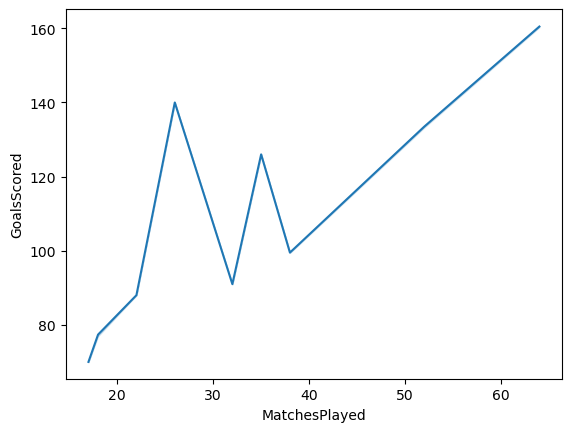

In [30]:
sns.lineplot(data=merged_data, x="MatchesPlayed", y="GoalsScored")

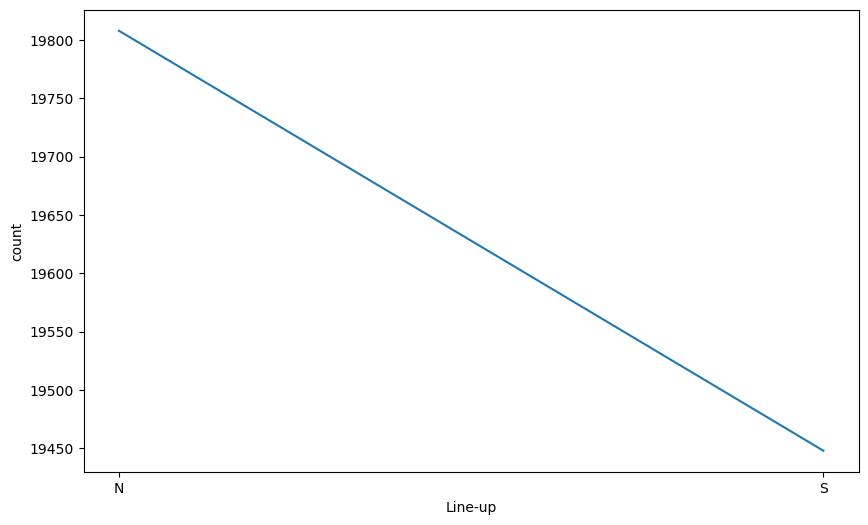

In [47]:
a = merged_data["Line-up"].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(a)
plt.show()

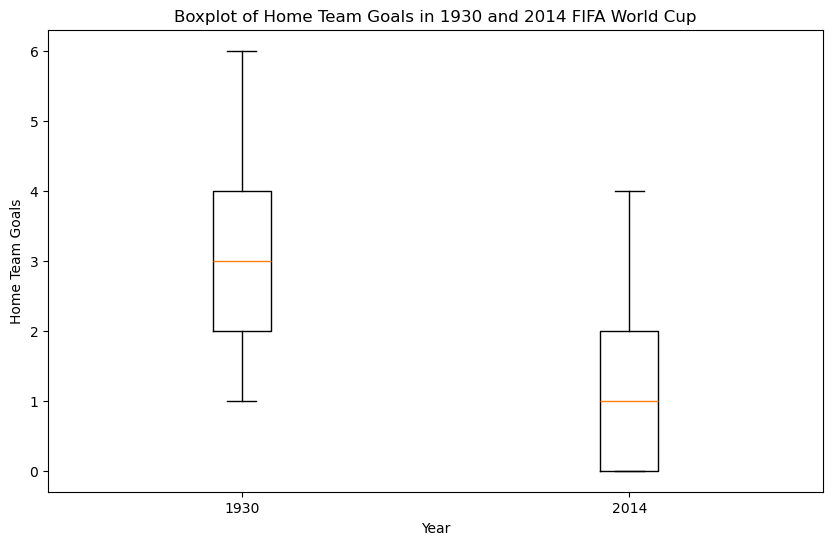

In [52]:
plt.figure(figsize=(10, 6))
plt.boxplot([merged_data[merged_data['Year'] == 1930]['Home Team Goals'], merged_data[merged_data['Year'] == 2014]['Home Team Goals']], labels=['1930', '2014'])
plt.title('Boxplot of Home Team Goals in 1930 and 2014 FIFA World Cup')
plt.xlabel('Year')
plt.ylabel('Home Team Goals')
plt.show()

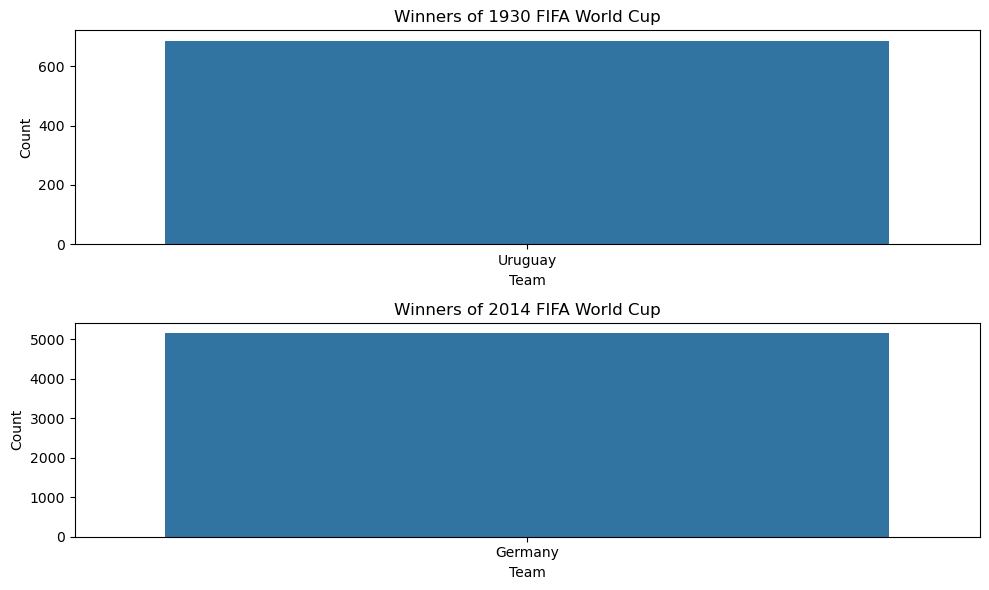

In [53]:
plt.figure(figsize=(10, 6))

winners_1930 = merged_data.loc[merged_data['Year'] == 1930, 'Winner']
winners_2014 = merged_data.loc[merged_data['Year'] == 2014, 'Winner']

winner_counts_1930 = winners_1930.value_counts()
winner_counts_2014 = winners_2014.value_counts()

plt.subplot(2, 1, 1)
sns.barplot(x=winner_counts_1930.index, y=winner_counts_1930.values)
plt.title('Winners of 1930 FIFA World Cup')
plt.xlabel('Team')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.barplot(x=winner_counts_2014.index, y=winner_counts_2014.values)
plt.title('Winners of 2014 FIFA World Cup')
plt.xlabel('Team')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

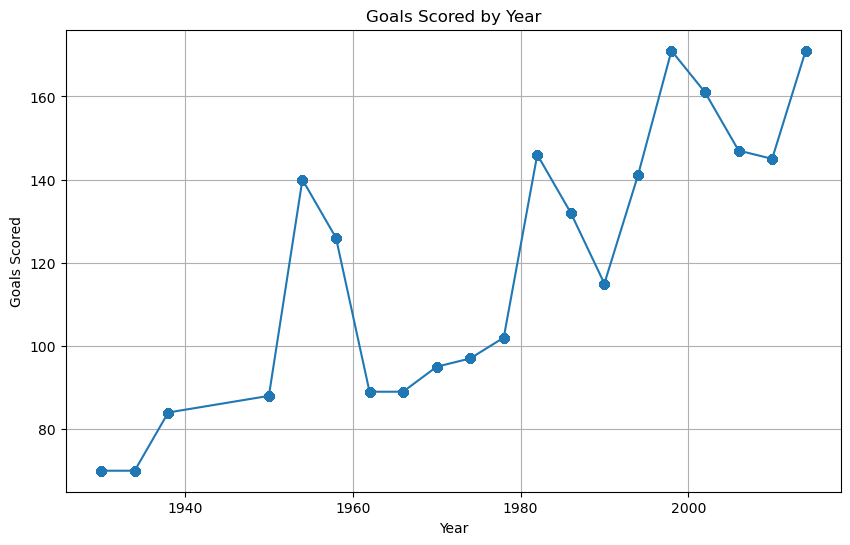

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['GoalsScored'], marker='o')
plt.title('Goals Scored by Year')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

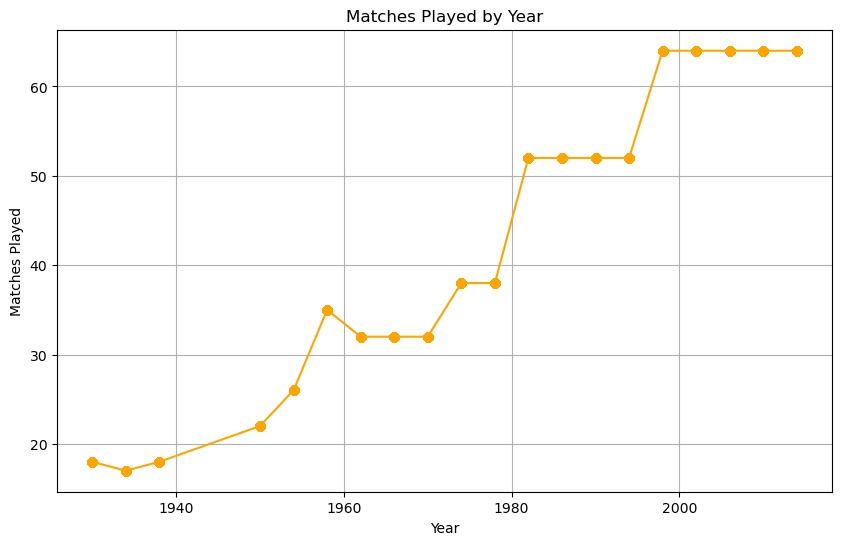

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['MatchesPlayed'], marker='o', color='orange')
plt.title('Matches Played by Year')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.grid(True)
plt.show()

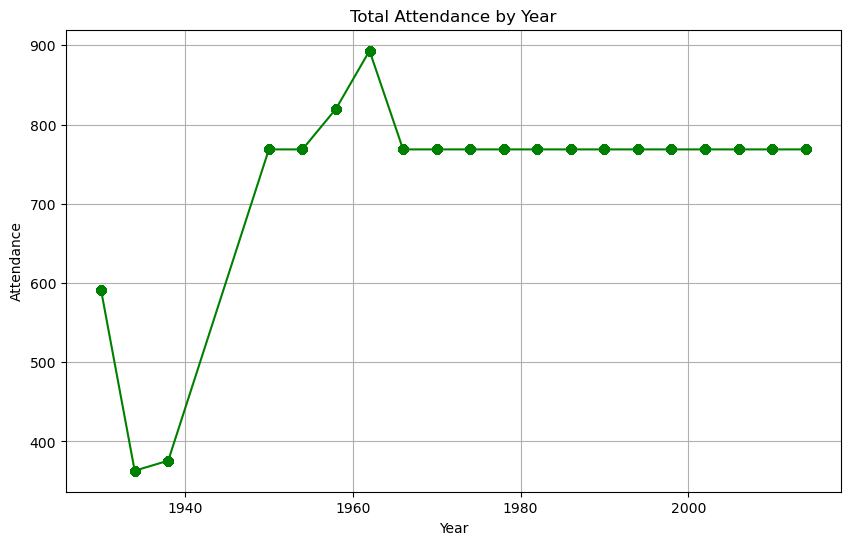

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['Attendance_y'], marker='o', color='green')
plt.title('Total Attendance by Year')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

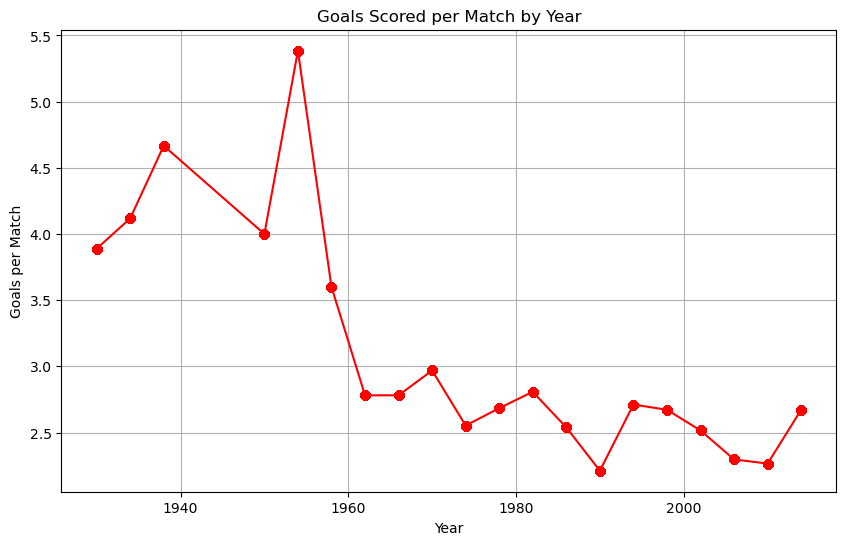

In [35]:
merged_data['GoalsPerMatch'] = merged_data['GoalsScored'] / merged_data['MatchesPlayed']
merged_data['GoalsPerMatch']

plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['GoalsPerMatch'], marker='o', color='red')
plt.title('Goals Scored per Match by Year')
plt.xlabel('Year')
plt.ylabel('Goals per Match')
plt.grid(True)
plt.show()

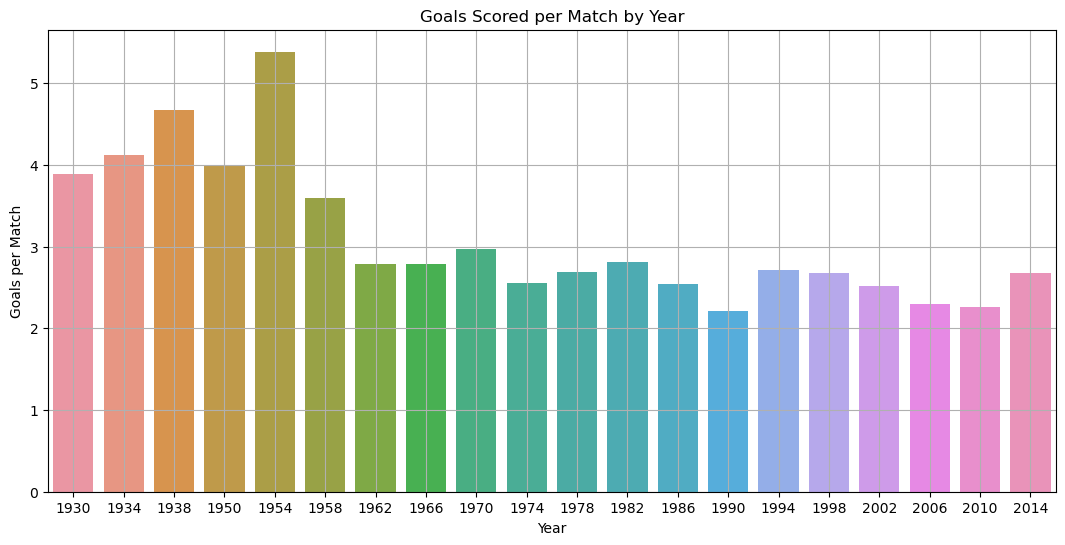

In [39]:
merged_data['GoalsPerMatch'] = merged_data['GoalsScored'] / merged_data['MatchesPlayed']
merged_data['GoalsPerMatch']

plt.figure(figsize=(13, 6))
sns.barplot(x = merged_data['Year'], y = merged_data['GoalsPerMatch'])
plt.title('Goals Scored per Match by Year')
plt.xlabel('Year')
plt.ylabel('Goals per Match')
plt.grid(True)
plt.show()

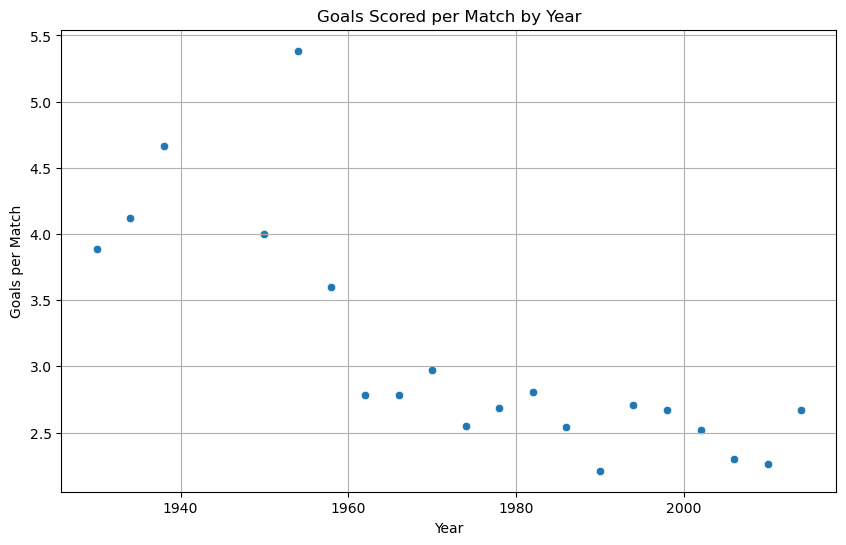

In [40]:
merged_data['GoalsPerMatch'] = merged_data['GoalsScored'] / merged_data['MatchesPlayed']
merged_data['GoalsPerMatch']

plt.figure(figsize=(10, 6))
sns.scatterplot(x =merged_data['Year'], y = merged_data['GoalsPerMatch'])
plt.title('Goals Scored per Match by Year')
plt.xlabel('Year')
plt.ylabel('Goals per Match')
plt.grid(True)
plt.show()

In [28]:
goals_by_year = merged_data.groupby('Year').sum().reset_index()
goals_by_year

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Event,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930,13 Jul 1930 - 15:00 13 Jul 1930 - 15:00 13 Jul...,Group 1Group 1Group 1Group 1Group 1Group 1Grou...,PocitosPocitosPocitosPocitosPocitosPocitosPoci...,Montevideo Montevideo Montevideo Montevideo Mo...,FranceFranceFranceFranceFranceFranceFranceFran...,2245.0,435.0,MexicoMexicoMexicoMexicoMexicoMexicoMexicoMexi...,...,...,G40'G70'G43' G87'G19'G45'G23'G69'G30'G62'G21'G...,UruguayUruguayUruguayUruguayUruguayUruguayUrug...,UruguayUruguayUruguayUruguayUruguayUruguayUrug...,ArgentinaArgentinaArgentinaArgentinaArgentinaA...,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,YugoslaviaYugoslaviaYugoslaviaYugoslaviaYugosl...,48090,8931,12366,405707.163
1,1934,27 May 1934 - 16:30 27 May 1934 - 16:30 27 May...,Preliminary roundPreliminary roundPreliminary ...,Stadio Benito MussoliniStadio Benito Mussolini...,Turin Turin Turin Turin Turin Turin Turin Turi...,AustriaAustriaAustriaAustriaAustriaAustriaAust...,1976.0,907.0,FranceFranceFranceFranceFranceFranceFranceFran...,Austria win after extra time Austria win after...,...,G93'G44'G18'G109'P116'G35' G39'G11'G31' G61'G5...,ItalyItalyItalyItalyItalyItalyItalyItalyItalyI...,ItalyItalyItalyItalyItalyItalyItalyItalyItalyI...,CzechoslovakiaCzechoslovakiaCzechoslovakiaCzec...,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,AustriaAustriaAustriaAustriaAustriaAustriaAust...,49140,11232,11934,254826.000
2,1938,04 Jun 1938 - 17:00 04 Jun 1938 - 17:00 04 Jun...,First roundFirst roundFirst roundFirst roundFi...,Parc des PrincesParc des PrincesParc des Princ...,Paris Paris Paris Paris Paris Paris Paris Pari...,SwitzerlandSwitzerlandSwitzerlandSwitzerlandSw...,2557.0,975.0,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,...,...,G29'R96'G43'G13'G15'G28' G89'G35' G76'G16' G69...,FranceFranceFranceFranceFranceFranceFranceFran...,ItalyItalyItalyItalyItalyItalyItalyItalyItalyI...,HungaryHungaryHungaryHungaryHungaryHungaryHung...,BrazilBrazilBrazilBrazilBrazilBrazilBrazilBraz...,SwedenSwedenSwedenSwedenSwedenSwedenSwedenSwed...,64008,11430,13716,286283.400
3,1950,24 Jun 1950 - 15:00 24 Jun 1950 - 15:00 24 Jun...,Group 1Group 1Group 1Group 1Group 1Group 1Grou...,Maracan� - Est�dio Jornalista M�rio FilhoMarac...,Rio De Janeiro Rio De Janeiro Rio De Janeiro R...,BrazilBrazilBrazilBrazilBrazilBrazilBrazilBraz...,2870.0,780.0,MexicoMexicoMexicoMexicoMexicoMexicoMexicoMexi...,...,...,G30' G79'G71'G65'G51'G39'G81'G89'G17'G83'G78'G...,BrazilBrazilBrazilBrazilBrazilBrazilBrazilBraz...,UruguayUruguayUruguayUruguayUruguayUruguayUrug...,BrazilBrazilBrazilBrazilBrazilBrazilBrazilBraz...,SwedenSwedenSwedenSwedenSwedenSwedenSwedenSwed...,SpainSpainSpainSpainSpainSpainSpainSpainSpainS...,80784,11934,20196,705581.226
4,1954,16 Jun 1954 - 18:00 16 Jun 1954 - 18:00 16 Jun...,Group 3Group 3Group 3Group 3Group 3Group 3Grou...,Wankdorf StadiumWankdorf StadiumWankdorf Stadi...,Berne Berne Berne Berne Berne Berne Berne Bern...,UruguayUruguayUruguayUruguayUruguayUruguayUrug...,4764.0,1364.0,CzechoslovakiaCzechoslovakiaCzechoslovakiaCzec...,...,...,G71'G84'G33'G69'G30'G23'G34' G43'G15'G84'G52'G...,SwitzerlandSwitzerlandSwitzerlandSwitzerlandSw...,Germany FRGermany FRGermany FRGermany FRGerman...,HungaryHungaryHungaryHungaryHungaryHungaryHung...,AustriaAustriaAustriaAustriaAustriaAustriaAust...,UruguayUruguayUruguayUruguayUruguayUruguayUrug...,159600,18240,29640,876211.980
5,1958,08 Jun 1958 - 14:00 08 Jun 1958 - 14:00 08 Jun...,Group 3Group 3Group 3Group 3Group 3Group 3Grou...,Rasunda StadiumRasunda StadiumRasunda StadiumR...,Solna Solna Solna Solna Solna Solna Solna Soln...,SwedenSwedenSwedenSwedenSwedenSwedenSwedenSwed...,3872.0,1672.0,MexicoMexicoMexicoMexicoMexicoMexicoMexicoMexi...,...,...,P57'G17' G64'G13'G66'G55'P85'G2'G32' G79'G40'G...,SwedenSwedenSwedenSwedenSwedenSwedenSwedenSwed...,BrazilBrazilBrazilBrazilB

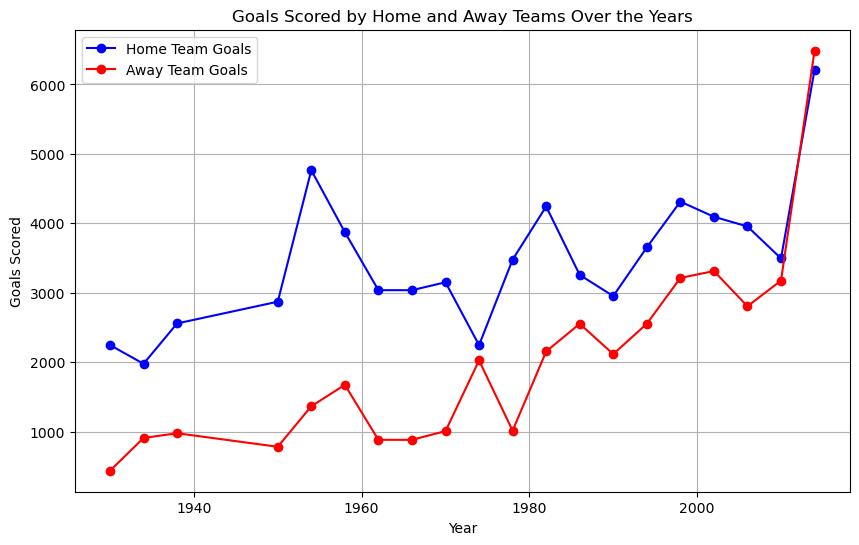

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(goals_by_year['Year'], goals_by_year['Home Team Goals'], marker='o', label='Home Team Goals', color='blue')
plt.plot(goals_by_year['Year'], goals_by_year['Away Team Goals'], marker='o', label='Away Team Goals', color='red')
plt.title('Goals Scored by Home and Away Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
merged_data['Total Goals'] = merged_data['Home Team Goals'] + merged_data['Away Team Goals']
goals_by_team = merged_data.groupby('Home Team Name')['Total Goals'].sum().reset_index()
goals_by_team

,Home Team Name,Total Goals
0,Algeria,666.0
1,Angola,46.0
2,Argentina,6968.0
3,Australia,822.0
4,Austria,2112.0
...,...,...
73,"rn"">Bosnia and Herzegovina",184.0
74,"rn"">Republic of Ireland",180.0
75,"rn"">Serbia and Montenegro",46.0
76,"rn"">Trinidad and Tobago",0.0


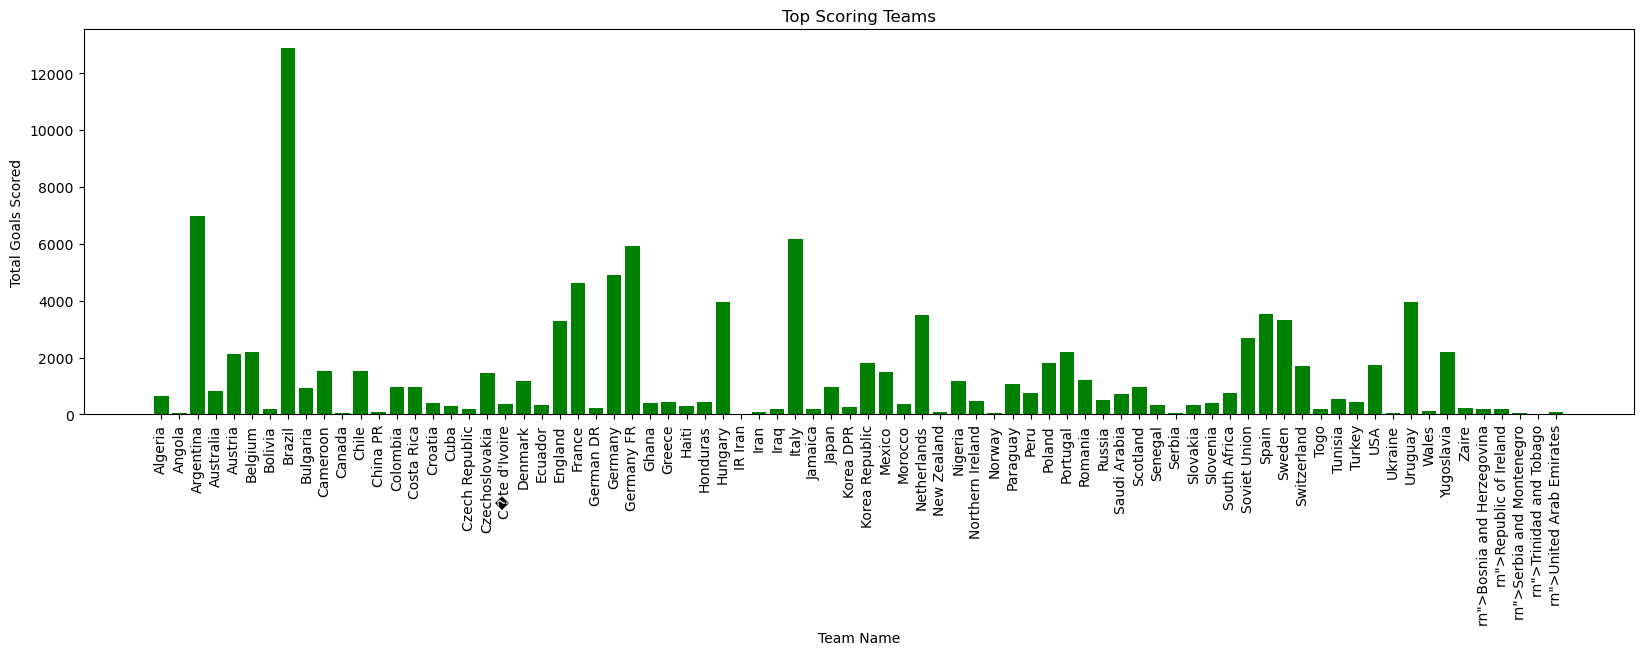

In [31]:
plt.figure(figsize=(20, 5))
plt.bar(goals_by_team['Home Team Name'], goals_by_team['Total Goals'], color='green')
plt.title('Top Scoring Teams')
plt.xlabel('Team Name')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=90)
plt.show()

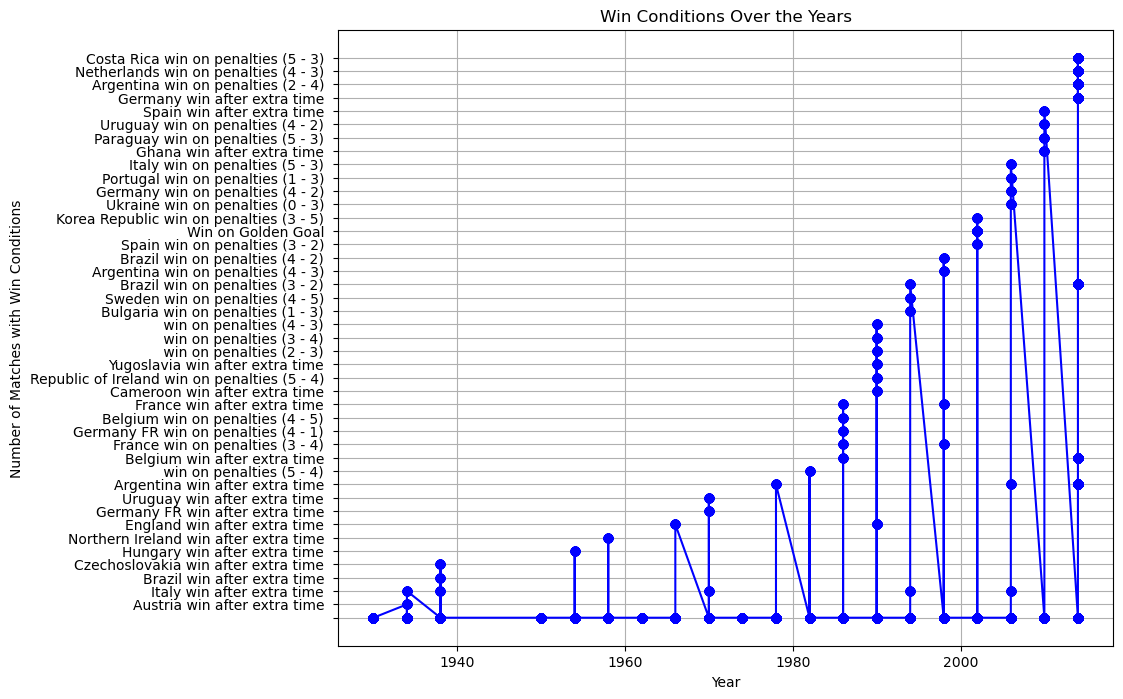

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(merged_data['Year'], merged_data["Win conditions"], marker='o', color='blue')
plt.title('Win Conditions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches with Win Conditions')
plt.grid(True)
plt.show()

In [33]:
merged_data['Total Goals'] = merged_data['Home Team Goals'] + merged_data['Away Team Goals']
merged_data['Total Goals']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
39251    1.0
39252    1.0
39253    1.0
39254    1.0
39255    1.0
Name: Total Goals, Length: 39256, dtype: float64

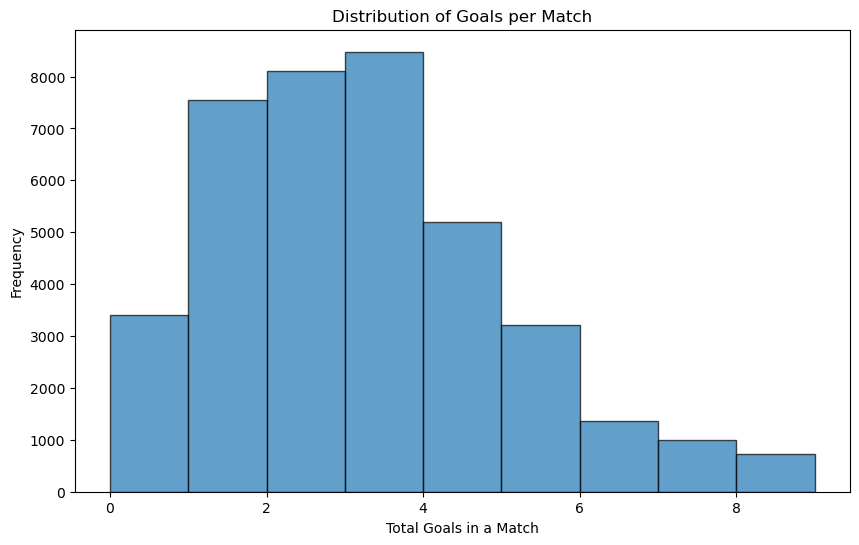

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Total Goals'], bins=range(0, 10), edgecolor='black', alpha=0.7)
plt.title('Distribution of Goals per Match')
plt.xlabel('Total Goals in a Match')
plt.ylabel('Frequency')
plt.show()

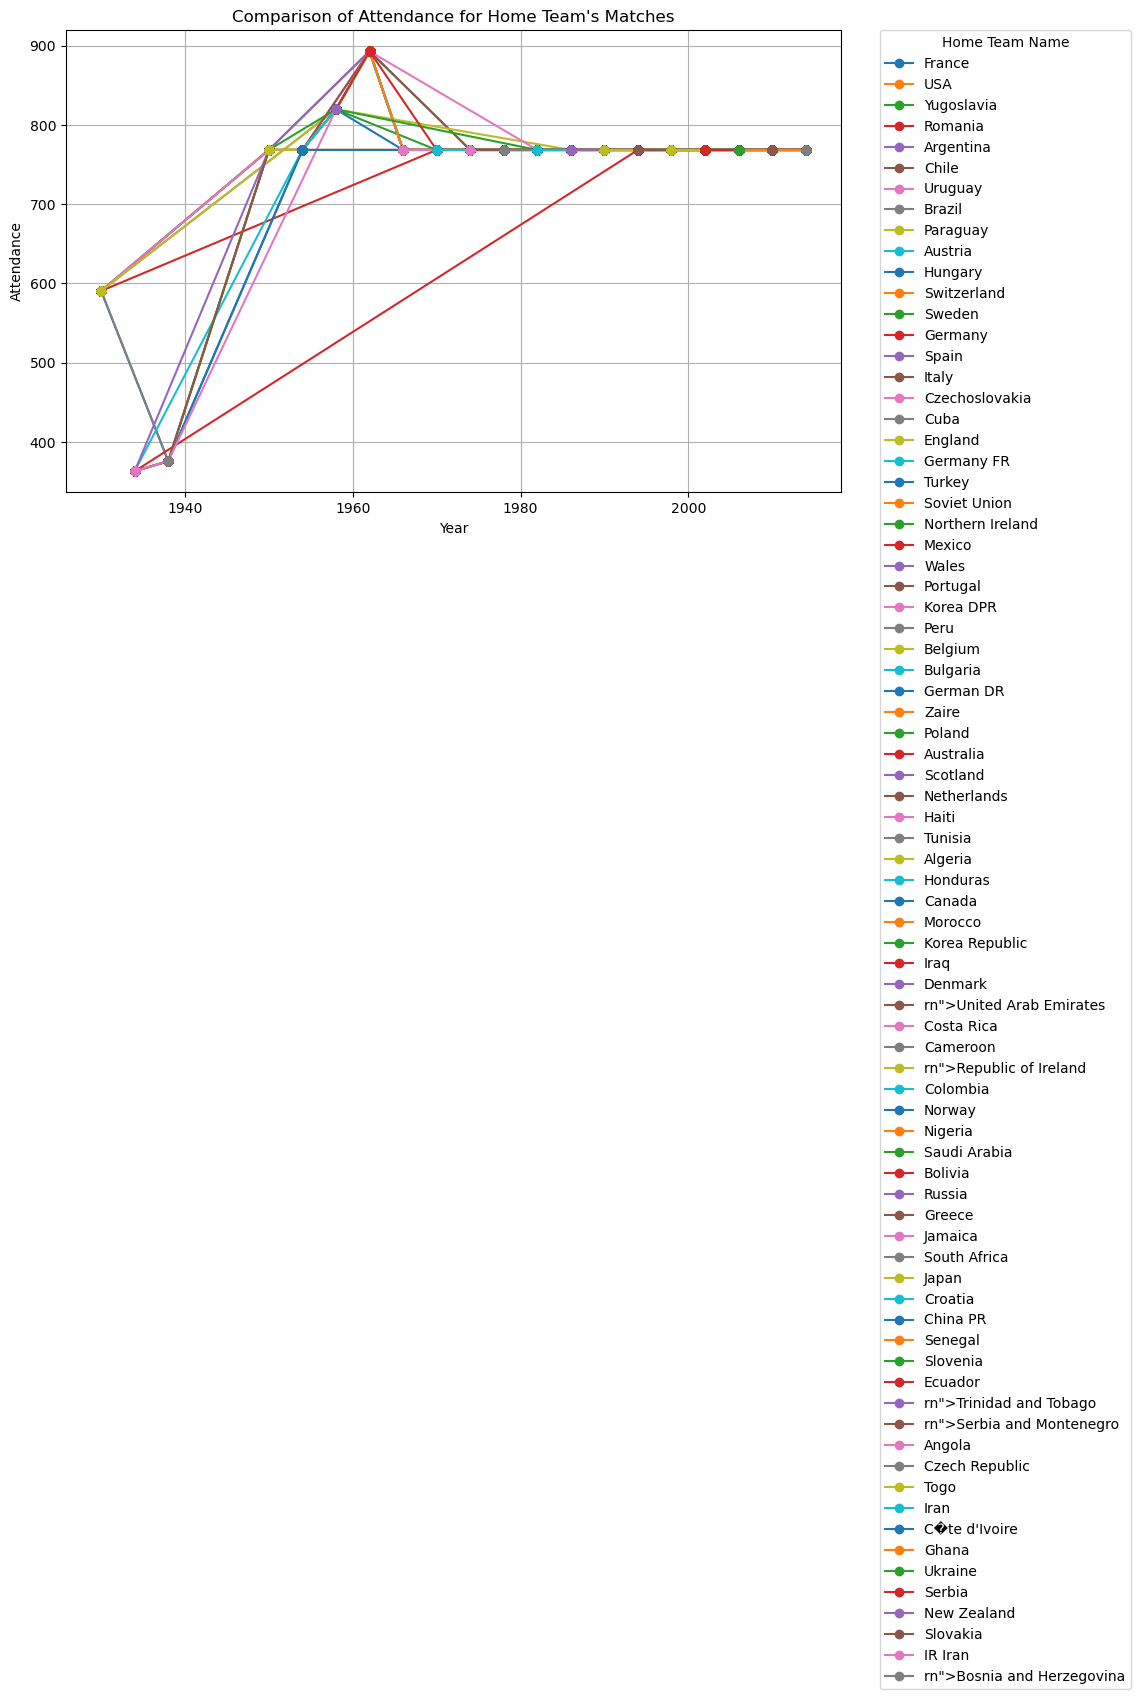

In [35]:
plt.figure(figsize=(10, 6))
for team in merged_data['Home Team Name'].unique():
    team_data = merged_data[merged_data['Home Team Name'] == team]
    plt.plot(team_data['Year'], team_data['Attendance_y'], marker='o', label=team)

plt.title('Comparison of Attendance for Home Team\'s Matches')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.legend(title='Home Team Name', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

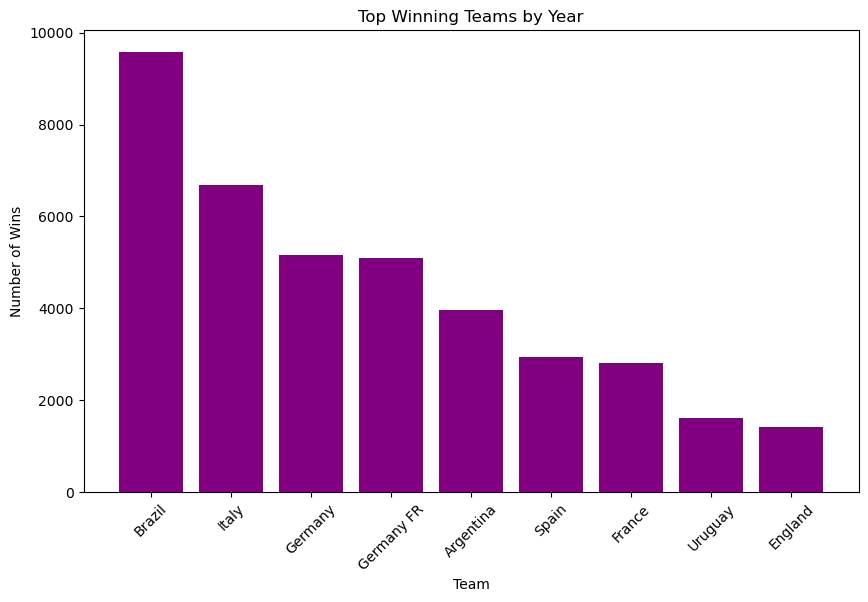

In [36]:
wins_by_team = merged_data['Winner'].value_counts().reset_index()
wins_by_team.columns = ['Team', 'Wins']


plt.figure(figsize=(10, 6))
plt.bar(wins_by_team['Team'], wins_by_team['Wins'], color='purple')
plt.title('Top Winning Teams by Year')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

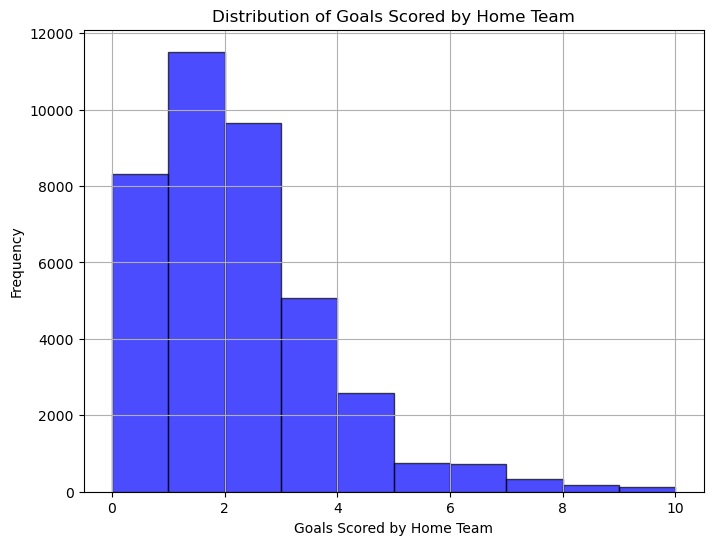

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Home Team Goals'], bins=range(int(merged_data['Home Team Goals'].min()), int(merged_data['Home Team Goals'].max()) + 1), color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Goals Scored by Home Team')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored by Home Team')
plt.grid(True)
plt.show()

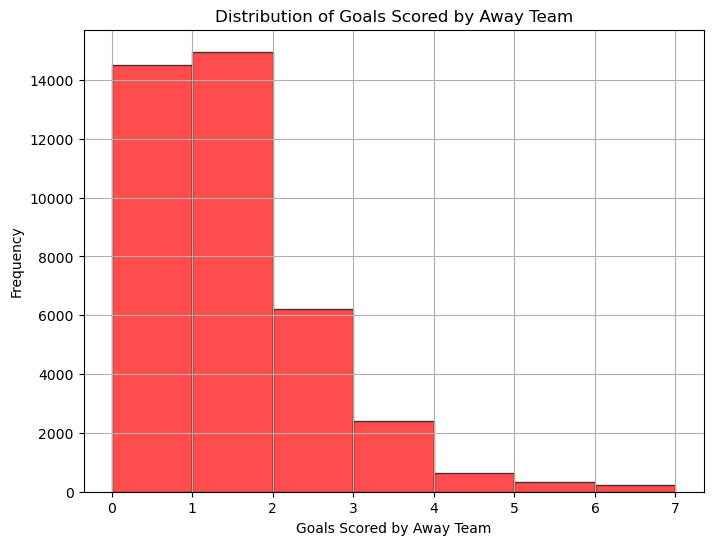

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Away Team Goals'], bins=range(int(merged_data['Away Team Goals'].min()), int(merged_data['Away Team Goals'].max()) + 1), color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Goals Scored by Away Team')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored by Away Team')
plt.grid(True)
plt.show()

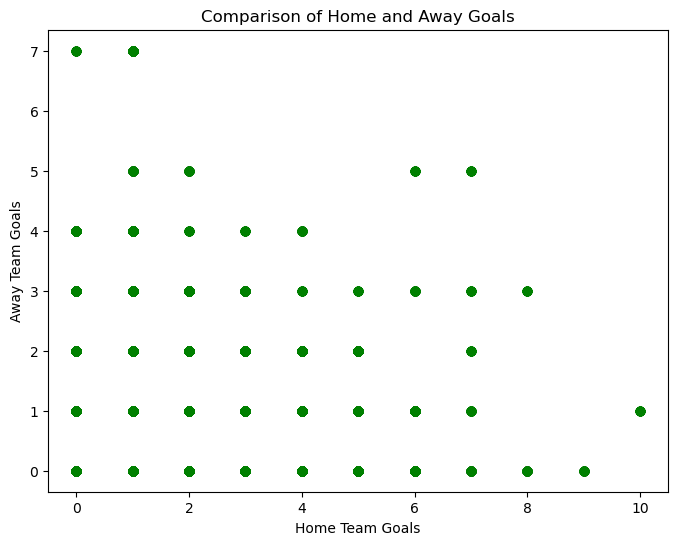

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Home Team Goals'], merged_data['Away Team Goals'], color='green', alpha=0.7)
plt.xlabel('Home Team Goals')
plt.ylabel('Away Team Goals')
plt.title('Comparison of Home and Away Goals')
plt.show()

In [40]:
matches_played_by_team = merged_data['Home Team Name'].value_counts().reset_index()
matches_played_by_team.columns = ['Home Team Name', 'Matches Played']

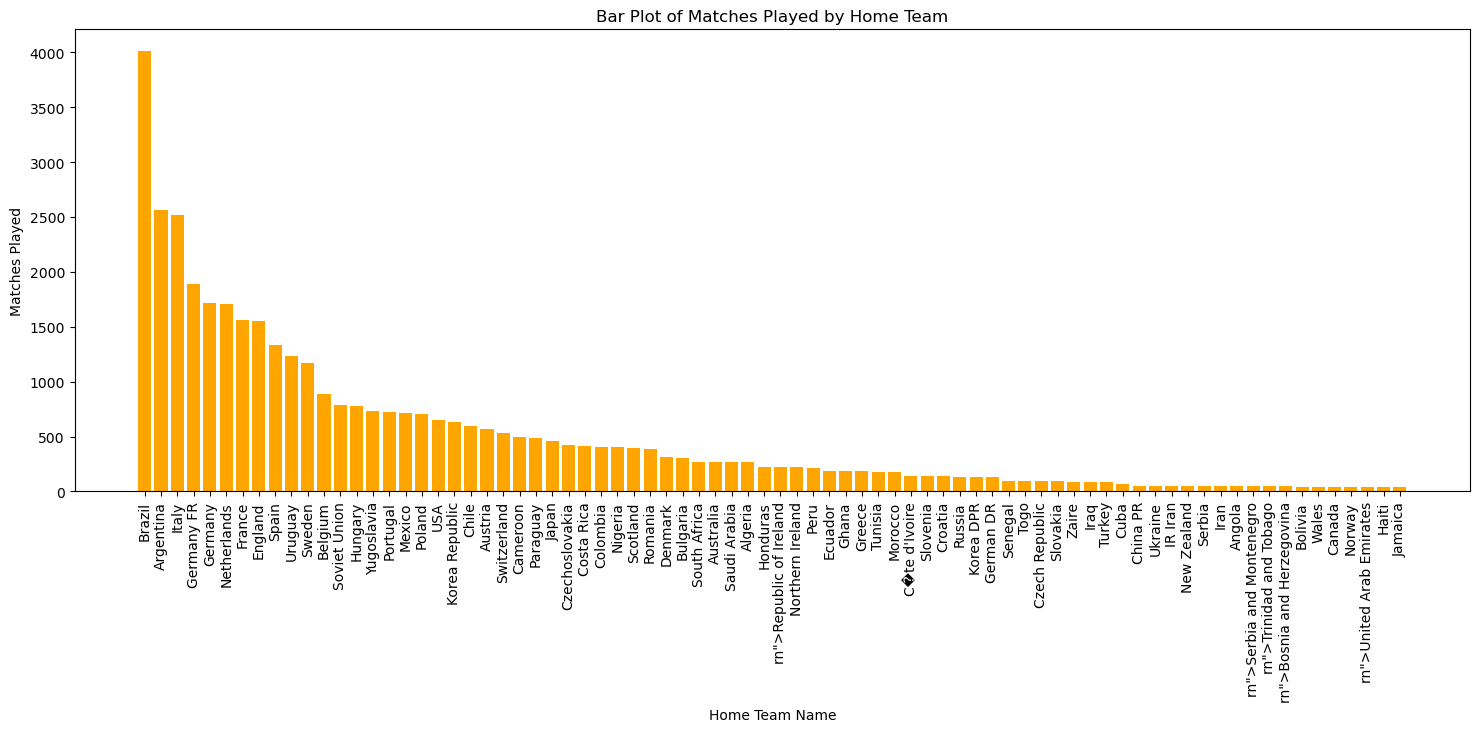

In [41]:
plt.figure(figsize=(18, 6))
plt.bar(matches_played_by_team['Home Team Name'], matches_played_by_team['Matches Played'], color='orange')
plt.title('Bar Plot of Matches Played by Home Team')
plt.xlabel('Home Team Name')
plt.ylabel('Matches Played')
plt.xticks(rotation=90)
plt.show()

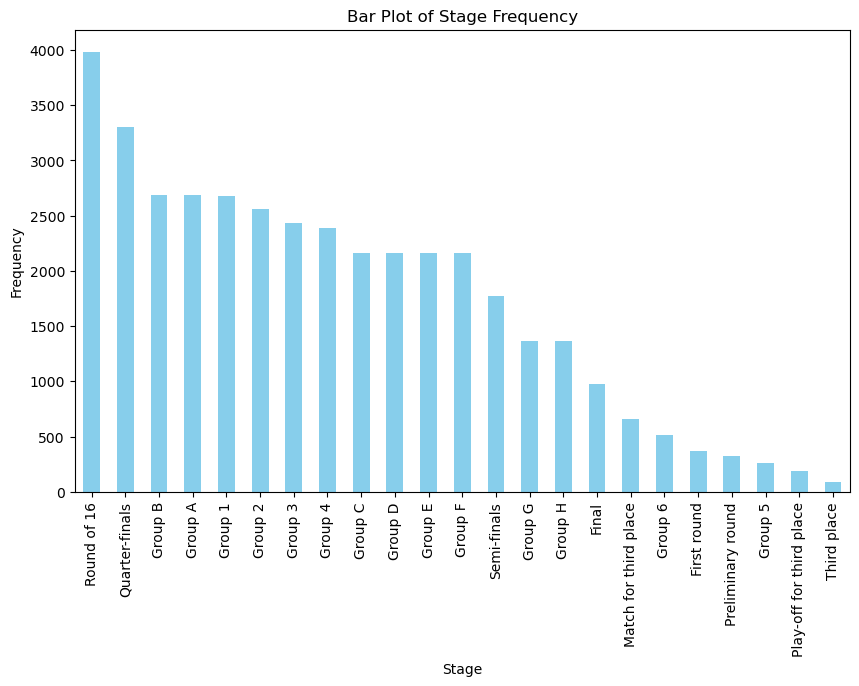

In [42]:
stage_counts = merged_data['Stage'].value_counts()

plt.figure(figsize=(10, 6))
stage_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Stage Frequency')
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [43]:
stage_win_counts = merged_data.groupby(['Stage', 'Win conditions']).size().unstack(fill_value=0)

<Figure size 1800x600 with 0 Axes>

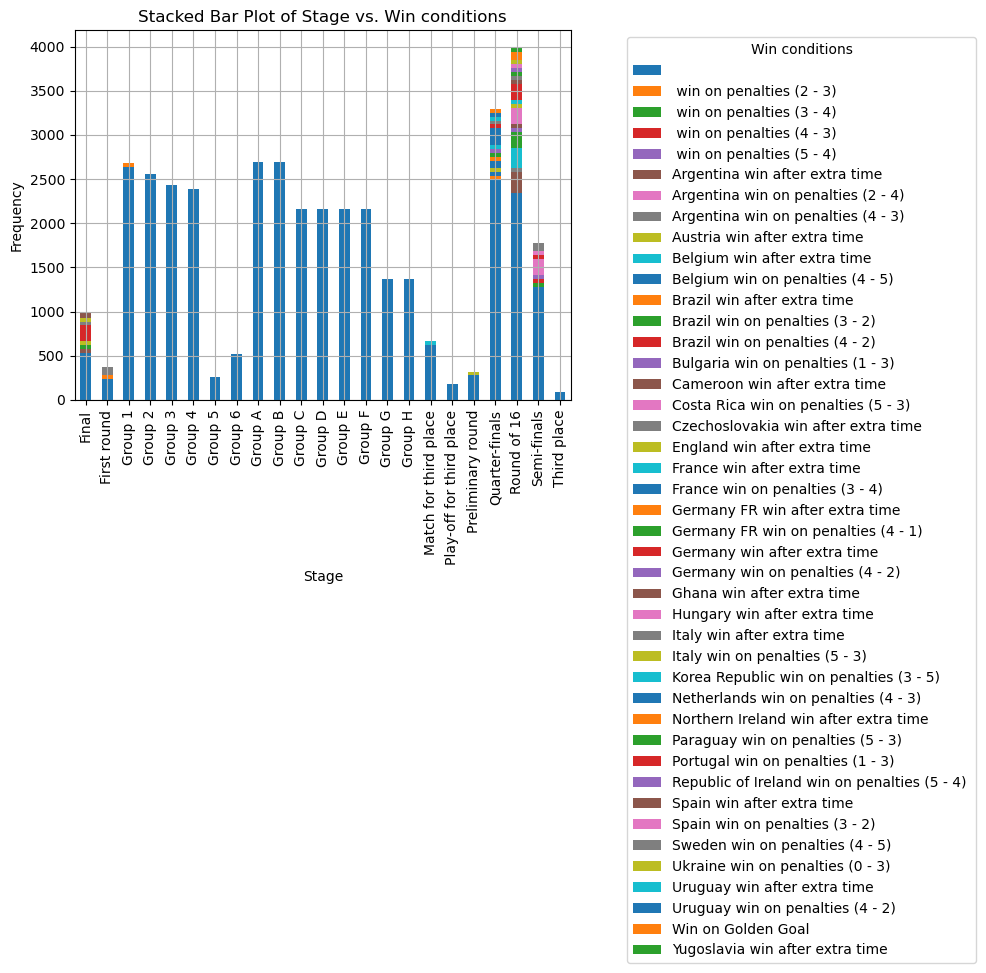

In [44]:
plt.figure(figsize=(18, 6))
stage_win_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Stage vs. Win conditions')
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Win conditions', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

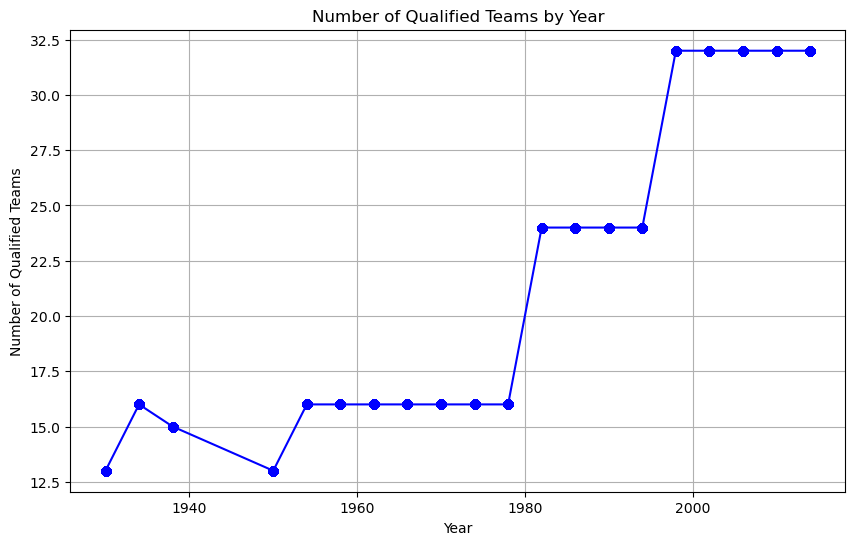

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['QualifiedTeams'], marker='o', color='blue')
plt.title('Number of Qualified Teams by Year')
plt.xlabel('Year')
plt.ylabel('Number of Qualified Teams')
plt.grid(True)
plt.show()

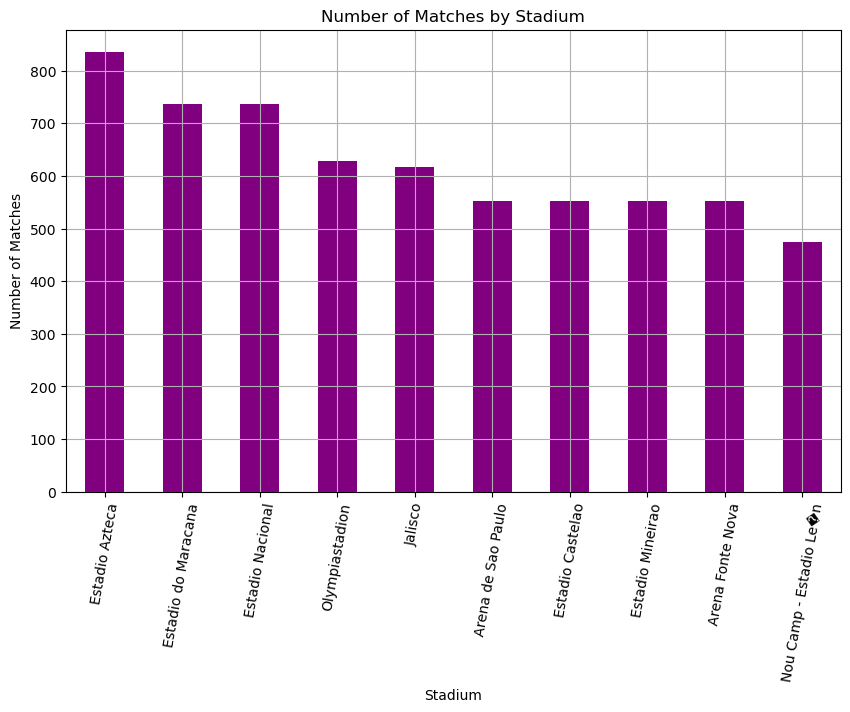

In [46]:
plt.figure(figsize=(10, 6))
stadium_counts = merged_data['Stadium'].value_counts().nlargest(10)
stadium_counts.plot(kind='bar', color='purple')
plt.title('Number of Matches by Stadium')
plt.xlabel('Stadium')
plt.ylabel('Number of Matches')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

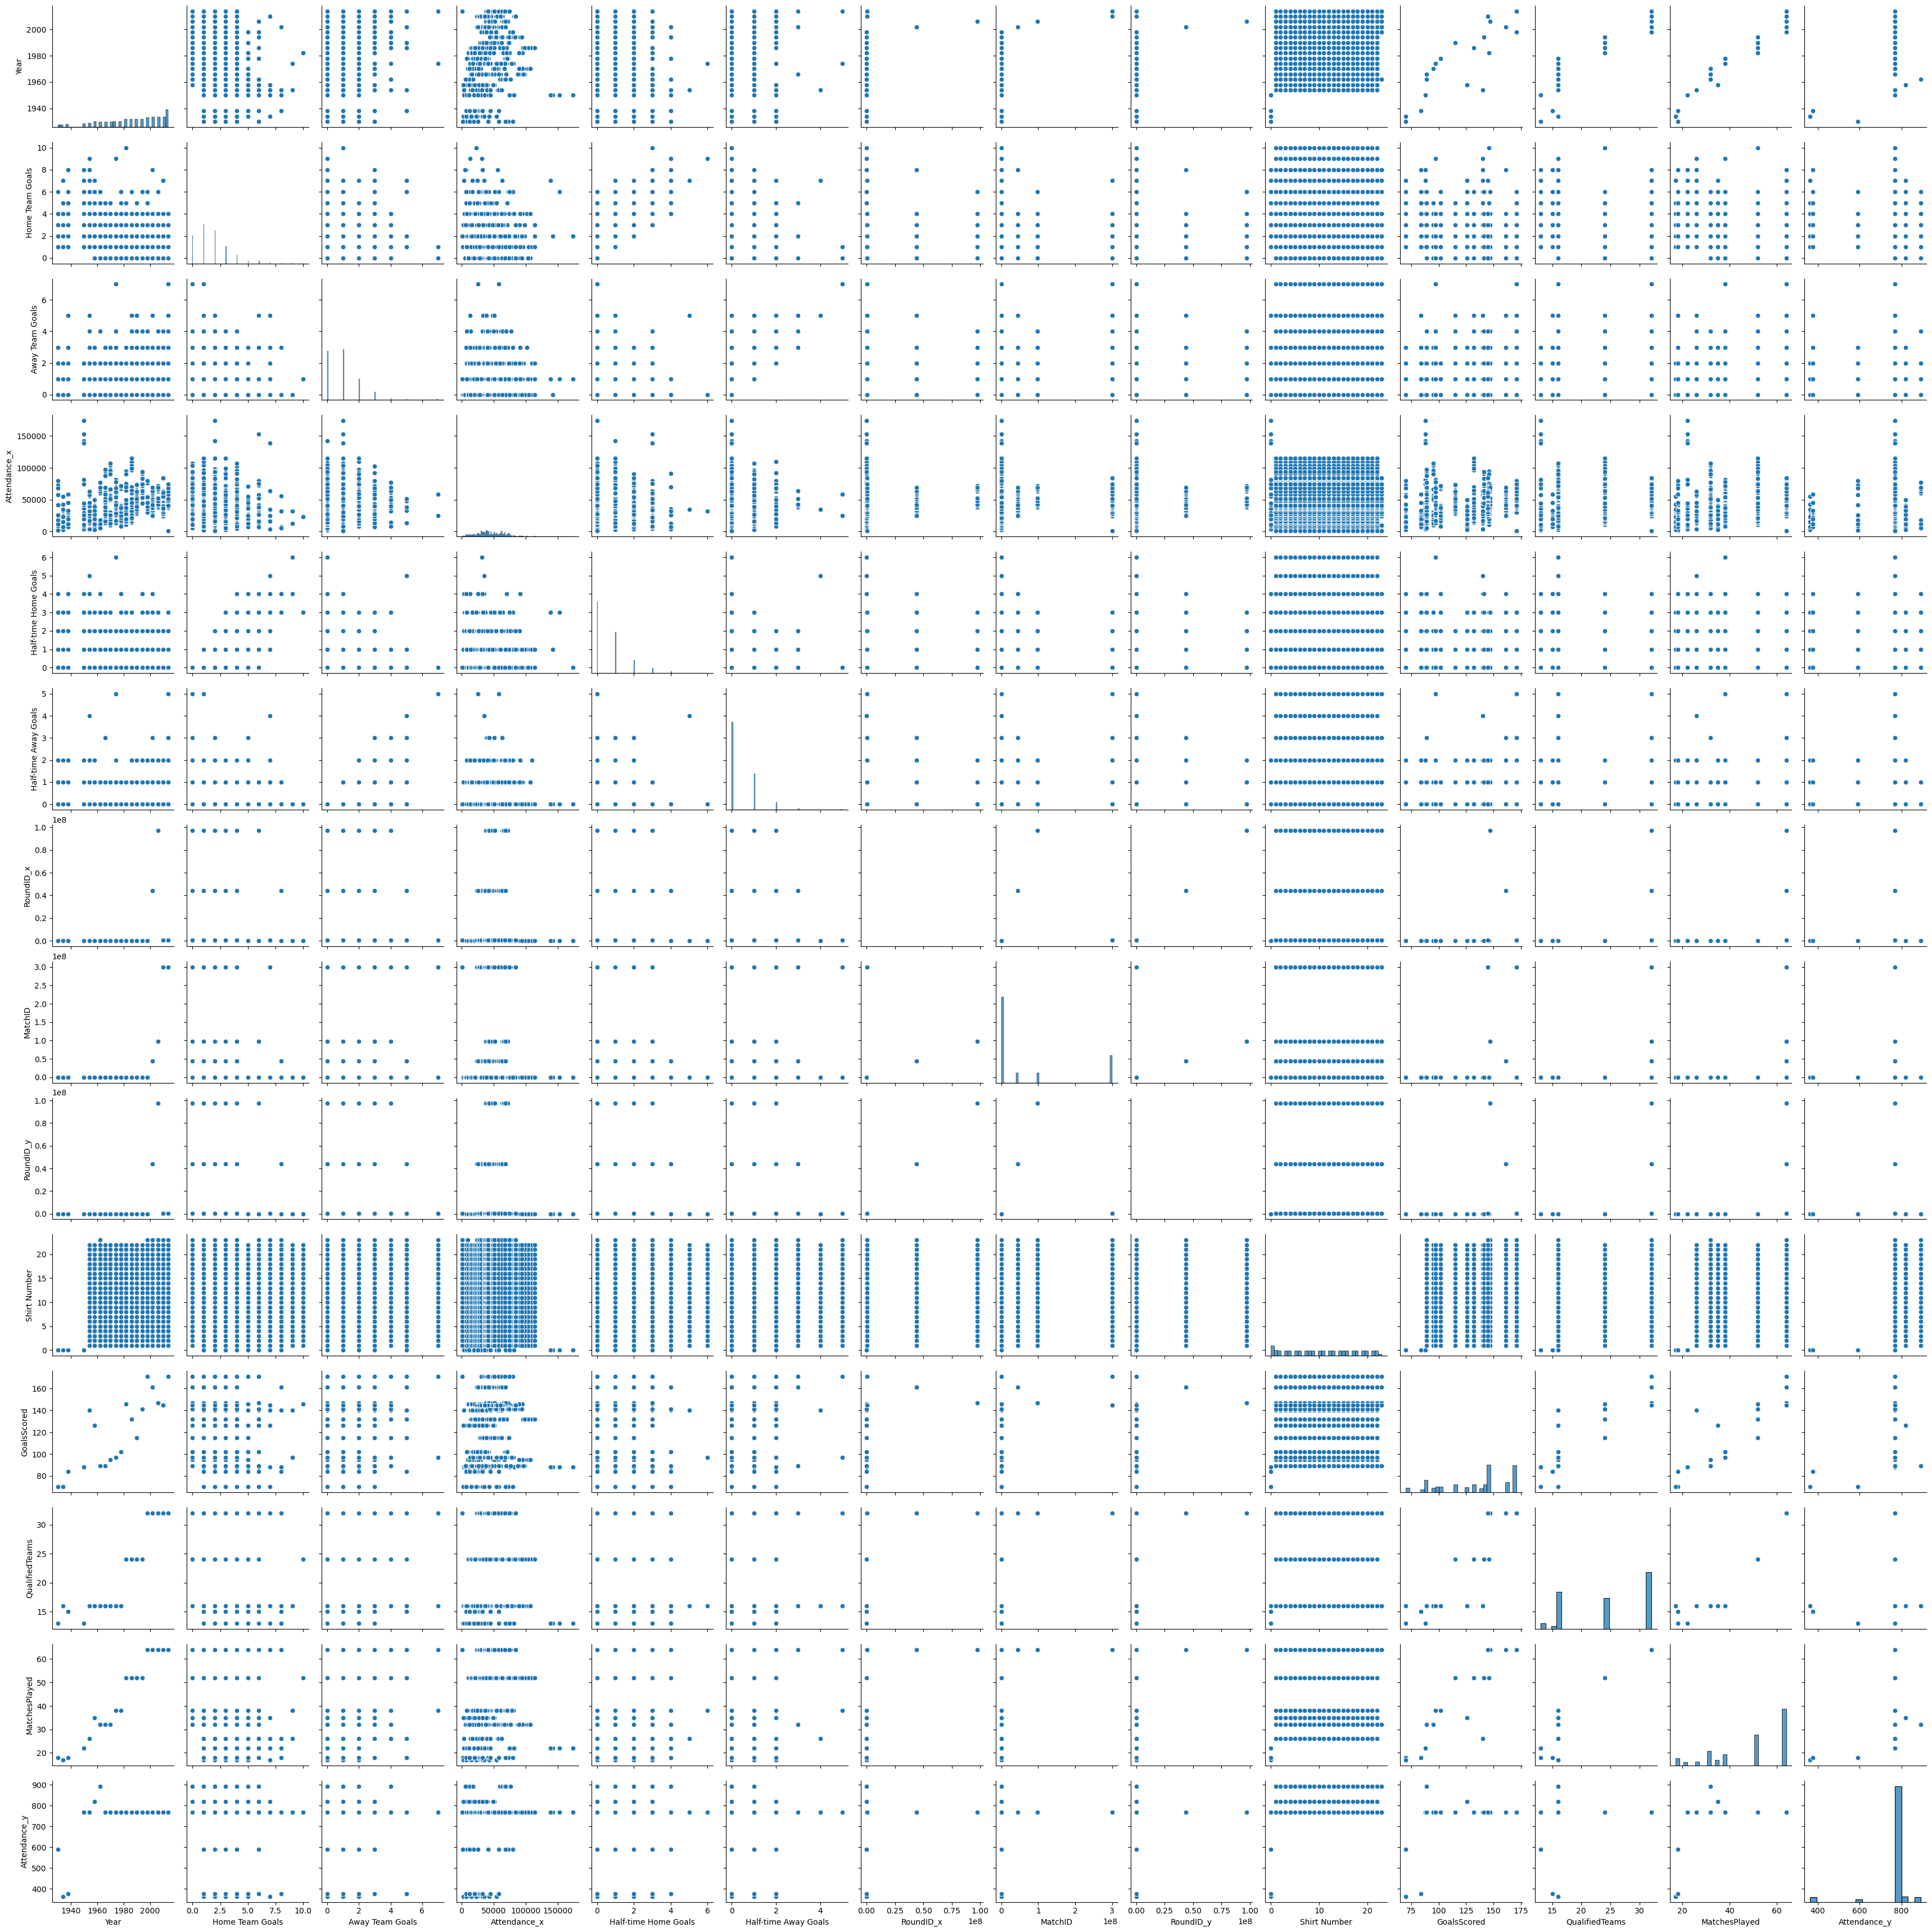

In [26]:
sns.pairplot(merged_data)

### Conclusion

In conclusion, while the FIFA World Cup captures the hearts of millions with its thrilling matches and star players, it is essential to acknowledge the behind-the-scenes efforts of the analysts who make this global event even more engaging. These unsung heroes meticulously collect, analyze, and interpret data, providing fans with the information they crave. Their dedication ensures that the spectacle of the World Cup is not just about the on-field action but also about the rich tapestry of statistics and insights that enhance the fans' experience. Their contributions, often overlooked, are fundamental to the success and enjoyment of this prestigious tournament.